# Capstone Exploratory Data Analysis

This notebook contains the steps done to perform an exploratory data analysis (EDA) to develop an initial report. The dataset used here is the CDC Diabetes Health Indicators dataset from UC Irvine Machine Learning Repository. The UC Irvine Machine Learning Repository points to a [dataset home page](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) from kaggle. The raw data comes from the Behavioral Risk Factor Surveilance System from CDC. We will use the CSV from kaggle to perform the exploratory data analysis

## Specifying the imports

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### General Settings

In [3]:
# Set display options 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Reading the Data

In [4]:
# Load BRFS csv into a dataframe
df = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Checking Data Quality

In [7]:
# Check for missing values
# Find columns with na count more than 0
df.isna().sum()[df.isna().sum() >0]

Series([], dtype: int64)

In [8]:
# Check for duplicate values 
dup_count = df.duplicated().sum()
print ("number of duplicate rows",dup_count)

number of duplicate rows 23899


In [9]:
# Remove the duplicates 
df =df.drop_duplicates()
df.shape

(229781, 22)

## Visualizing the data

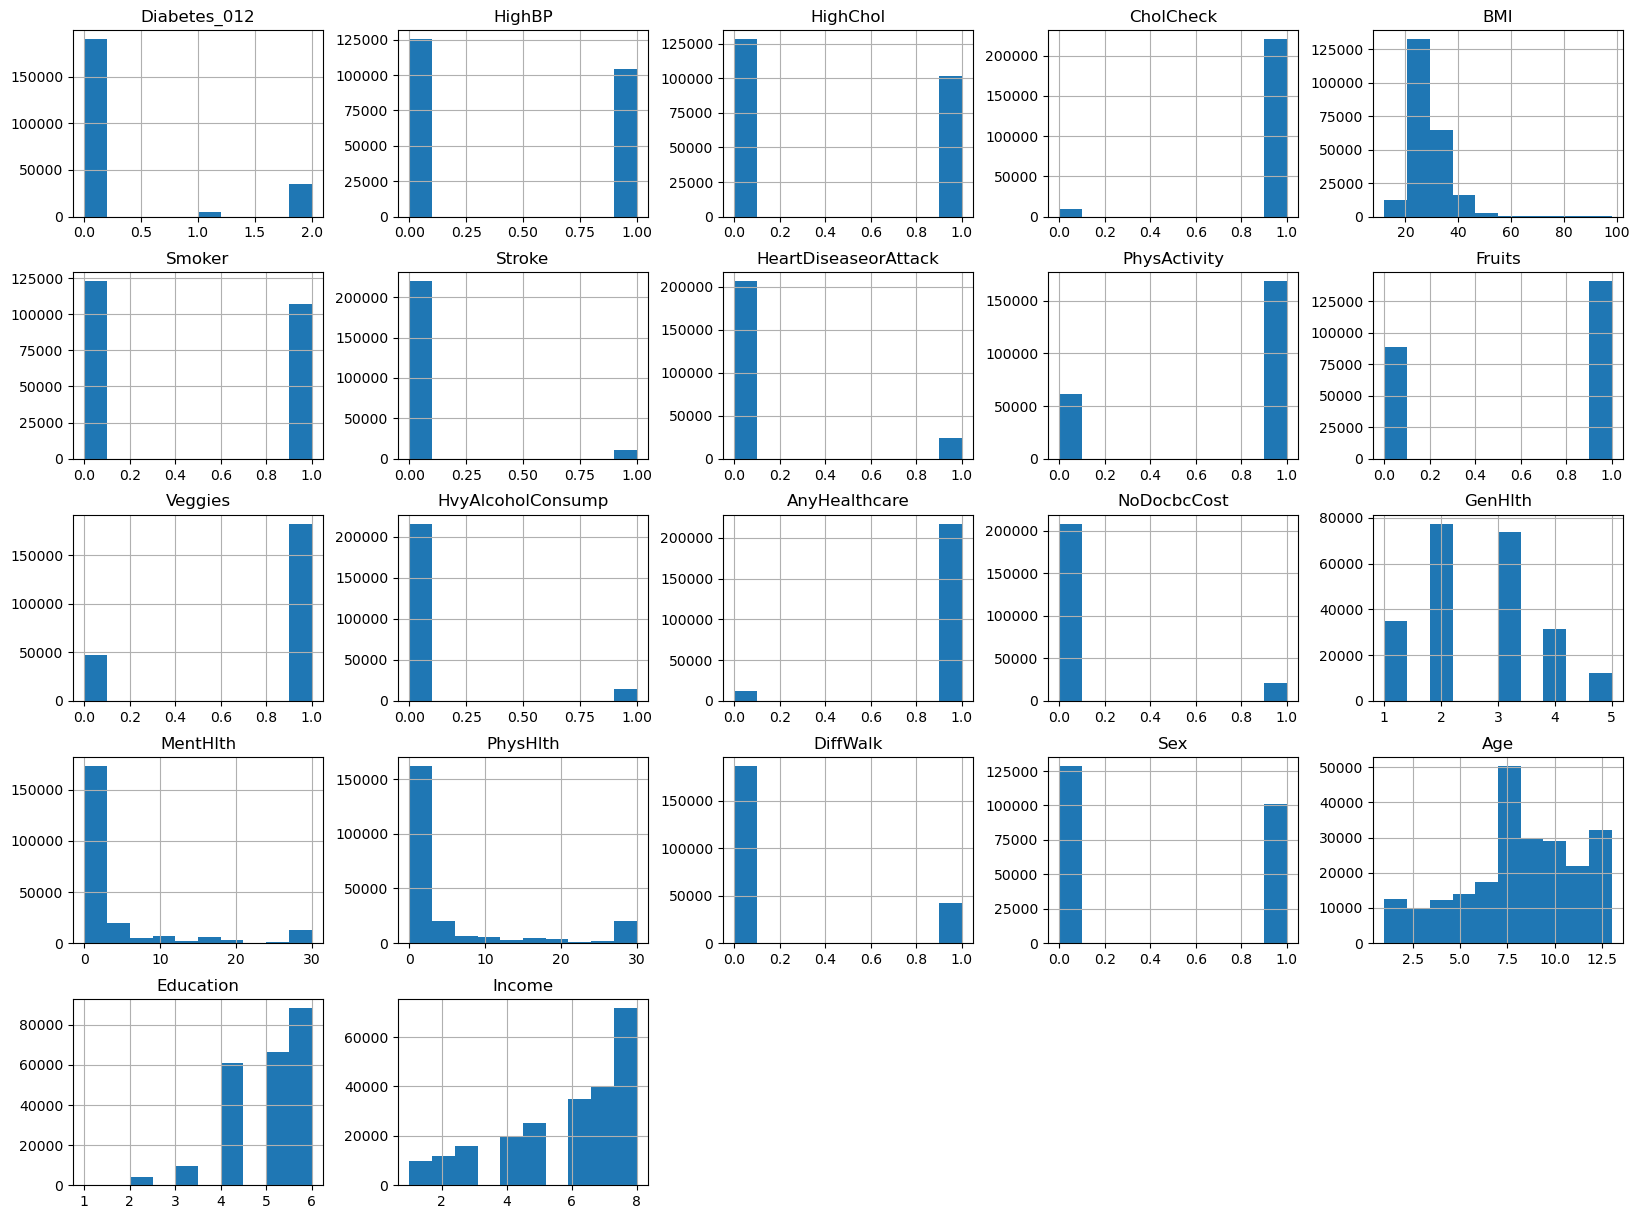

In [40]:
# Plot a histogram of features 
df.hist(figsize=(20,15));
plt.savefig("images/histograms.png", dpi =300)
plt.show()

Diabetes_012
0.0    190055
1.0      4629
2.0     35097
Name: count, dtype: int64


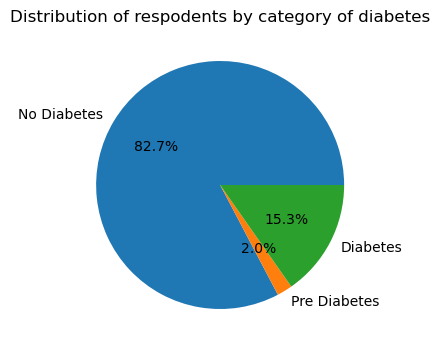

In [47]:
# Pie plot showing distribution of respodents by target column
# 0 --> No Diabetes
# 1 --> Pre Diabetes
# 2 --> Diabetes
value_counts = df['Diabetes_012'].value_counts().sort_index()
print(value_counts)

plt.figure(figsize=(4,10))
plt.title("Distribution of respodents by category of diabetes")
plt.pie(value_counts, labels =["No Diabetes", "Pre Diabetes",  "Diabetes"], autopct="%1.1f%%")
plt.savefig("images/diabetes_distribution.png", dpi =300)
plt.show()

In [48]:
# Corelation between target column and other columns 
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,0.170816,-0.103408,-0.025462,-0.043446,-0.067164,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
HighBP,0.261976,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.201271,-0.104131,-0.019329,-0.042853,-0.014218,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.203327,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.176279,-0.063266,-0.026125,-0.027254,-0.019104,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.075701,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.049995,-0.004409,0.017973,-0.000537,-0.021043,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.212027,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.039926,-0.127864,-0.067528,-0.044185,-0.058334,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.046774,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.105154,-0.066981,-0.061947,-0.013892,0.096052,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.100276,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.198863,-0.059440,-0.004613,-0.033141,-0.021272,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
HeartDiseaseorAttack,0.170816,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,1.000000,-0.073267,-0.007128,-0.027330,-0.035453,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
PhysActivity,-0.103408,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.073267,1.000000,0.125283,0.135478,0.023190,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.025462,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.007128,0.125283,1.000000,0.243114,-0.028357,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


In [66]:
# 0 --> No Diabetes
# 1 --> Pre Diabetes
# 2 --> Diabetes
numeric_features = ["BMI","MentHlth","PhysHlth"]
diabetes_labels = {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}
plot_df = df.copy()
plot_df['Diabetes Category'] = plot_df['Diabetes_012'].map(diabetes_labels)

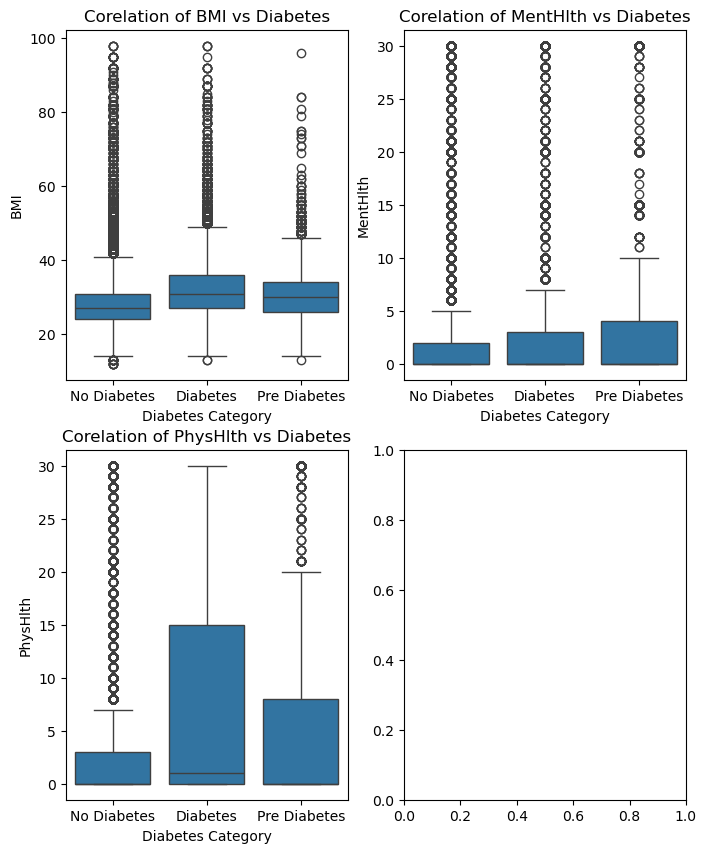

In [67]:
# We will create a combined box plot of numeric features using subplots 
fig, axes = plt.subplots(2,2,figsize=(8,10))
axes = axes.flatten()

for axis,column in zip(axes,numeric_features):
    sns.boxplot(data=plot_df, x='Diabetes Category', y=column,ax=axis)
    axis.set_title(f"Corelation of {column} vs Diabetes")
plt.savefig("images/numeric_boxplots.png", dpi =300)
plt.show()

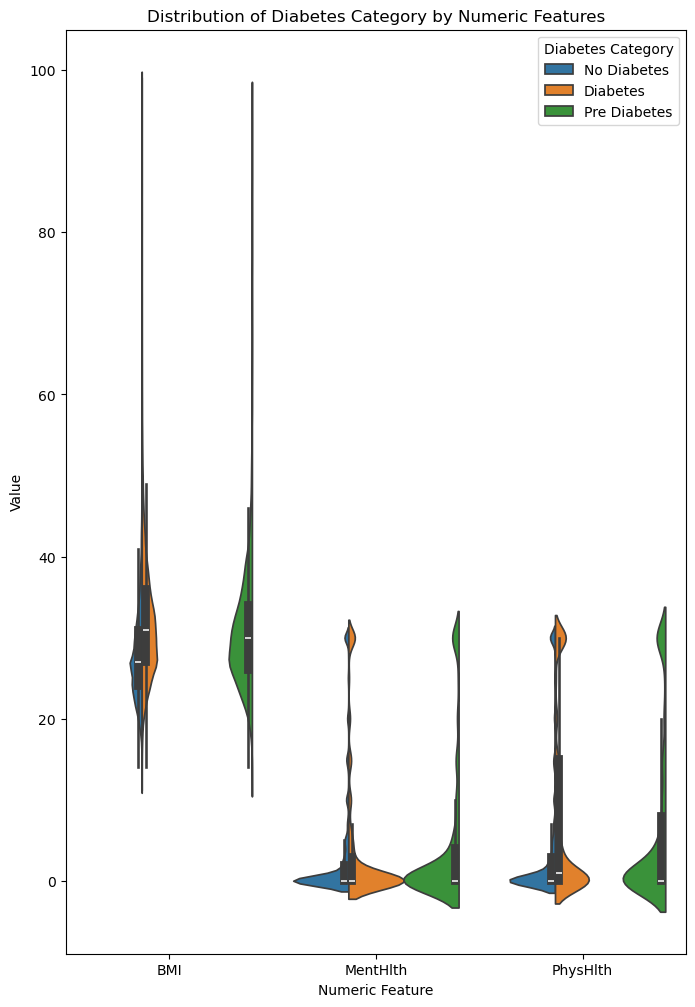

In [69]:
# We will create a combined violin plot of the numeric features 

melted_df = plot_df.melt(id_vars='Diabetes Category', var_name='Numeric Feature', value_name='Value', value_vars= numeric_features)
plt.figure(figsize=(8,12))
plt.title("Distribution of Diabetes Category by Numeric Features")
sns.violinplot(data=melted_df,x='Numeric Feature', y='Value', hue="Diabetes Category", split=True)
plt.savefig("images/numeric_violinplots.png", dpi =300)
plt.show()

In [ ]:
# We will create a combined countplot for binary categorical columns 

